This notebook should be run after `glo_30.geojson.zip` and `glo_90.geojson.zip` have been generated in the previous notebook.

In [1]:
from dem_stitcher.geojson_io import read_geojson_gzip, to_geojson_gzip
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
df_glo30 = read_geojson_gzip('data/glo_30.geojson.zip')
df_glo90 = read_geojson_gzip('data/glo_90.geojson.zip')

<AxesSubplot:>

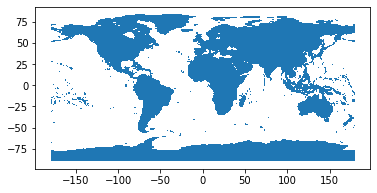

In [3]:
df_glo90.plot()

In [4]:
geometry_shrunk = df_glo30.geometry.buffer(-.01).unary_union

/var/folders/s6/fbsc26cd0ddffbp3_knts_9c0wcxj1/T/ipykernel_85443/1417027846.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometry_shrunk = df_glo30.geometry.buffer(-.01).unary_union


In [5]:
missing_indices = ~(df_glo90.geometry.intersects(geometry_shrunk))
np.sum(missing_indices)

25

In [6]:
df_glo90_missing = df_glo90[missing_indices].reset_index(drop=True)
df_glo90_missing.head()

,geometry,tile_id,url
0,"POLYGON ((46.00000 38.00000, 46.00000 39.00000...",Copernicus_DSM_COG_30_N38_00_E045_00_DEM,https://copernicus-dem-90m.s3.amazonaws.com/20...
1,"POLYGON ((47.00000 38.00000, 47.00000 39.00000...",Copernicus_DSM_COG_30_N38_00_E046_00_DEM,https://copernicus-dem-90m.s3.amazonaws.com/20...
2,"POLYGON ((49.00000 38.00000, 49.00000 39.00000...",Copernicus_DSM_COG_30_N38_00_E048_00_DEM,https://copernicus-dem-90m.s3.amazonaws.com/20...
3,"POLYGON ((50.00000 38.00000, 50.00000 39.00000...",Copernicus_DSM_COG_30_N38_00_E049_00_DEM,https://copernicus-dem-90m.s3.amazonaws.com/20...
4,"POLYGON ((45.00000 39.00000, 45.00000 40.00000...",Copernicus_DSM_COG_30_N39_00_E044_00_DEM,https://copernicus-dem-90m.s3.amazonaws.com/20...


(36.0, 44.0)

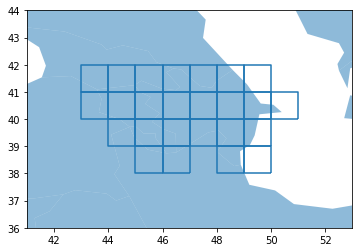

In [7]:
fig, ax = plt.subplots()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df_glo90_missing.boundary.plot(ax=ax, zorder=2)
world.plot(ax=ax, alpha=.5, zorder=1)

xmin, ymin, xmax, ymax = df_glo90_missing.total_bounds
ax.set_xlim(xmin - 2, xmax + 2)
ax.set_ylim(ymin - 2, ymax + 2)

In [8]:
DATA_PATH = Path('data')
DATA_PATH.mkdir(exist_ok=True)

In [9]:
to_geojson_gzip(df_glo90_missing, DATA_PATH/'glo_90_missing.geojson.zip')

PosixPath('data/glo_90_missing.geojson.zip')